**Importing Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [ ]:
x_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
x_validation.shape

(4410, 32, 32, 3)

In [ ]:
y_validation.shape

(4410,)

In [ ]:
x_test.shape

(12630, 32, 32, 3)

In [ ]:
y_test.shape

(12630,)

**Exploring Images**

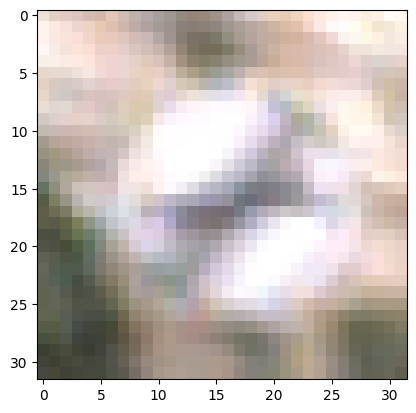

In [ ]:
plt.imshow(x_train[40])

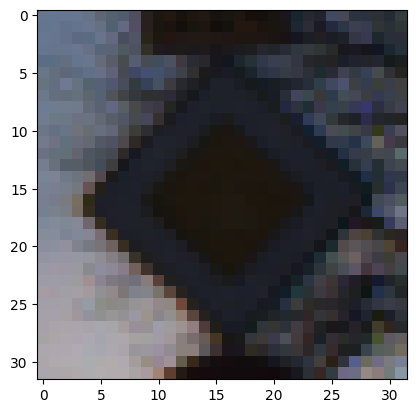

In [ ]:
plt.imshow(x_test[300])

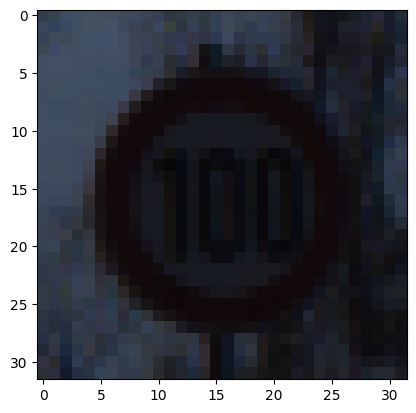

In [ ]:
plt.imshow(x_test[40])

**Preparing Data**

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)


In [ ]:
x_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
x_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

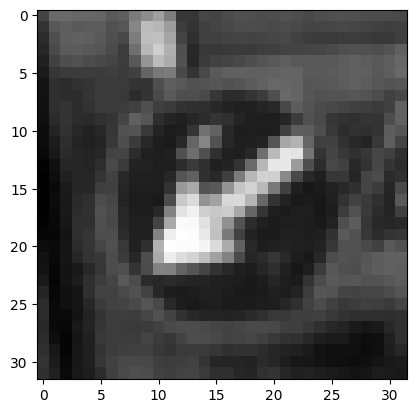

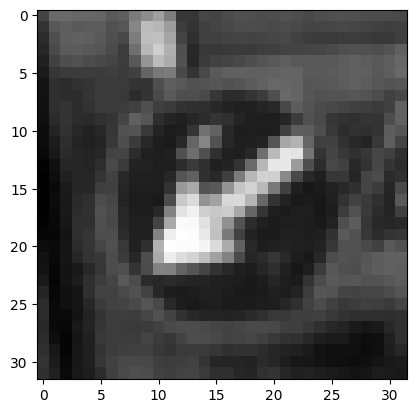

In [ ]:
i = 610
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

**Training Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [ ]:
image_shape = x_train_gray[i].shape

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
history = cnn_model.fit(x_train_gray_norm, y_train, batch_size=500, epochs=10, verbose=1, validation_data = (x_validation_gray_norm,y_validation))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
70/70 [==============================] - 19s 257ms/step - loss: 0.1482 - accuracy: 0.9609 - val_loss: 0.5602 - val_accuracy: 0.8444
Epoch 2/10
70/70 [==============================] - 16s 235ms/step - loss: 0.1205 - accuracy: 0.9702 - val_loss: 0.5506 - val_accuracy: 0.8578
Epoch 3/10
70/70 [==============================] - 16s 235ms/step - loss: 0.1065 - accuracy: 0.9737 - val_loss: 0.5445 - val_accuracy: 0.8635
Epoch 4/10
70/70 [==============================] - 18s 255ms/step - loss: 0.1049 - accuracy: 0.9726 - val_loss: 0.6210 - val_accuracy: 0.8549
Epoch 5/10
70/70 [==============================] - 16s 235ms/step - loss: 0.0913 - accuracy: 0.9764 - val_loss: 0.5702 - val_accuracy: 0.8483
Epoch 6/10
70/70 [==============================] - 16s 234ms/step - loss: 0.0905 - accuracy: 0.9763 - val_loss: 0.6081 - val_accuracy: 0.8619
Epoch 7/10
70/70 [==============================] - 20s 286ms/step - loss: 0.0772 - accuracy: 0.9807 - val_loss: 0.5752 - val_accuracy: 0.8660

**Evaluating Model**

In [ ]:
score = cnn_model.evaluate(x_test_gray_norm, y_test, verbose=0)
print('Test Accuracy: {:.4f}'.format(score[1]))

Test Accuracy: 0.8619


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

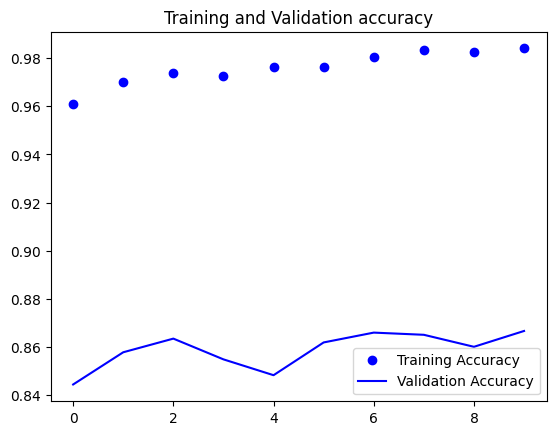

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


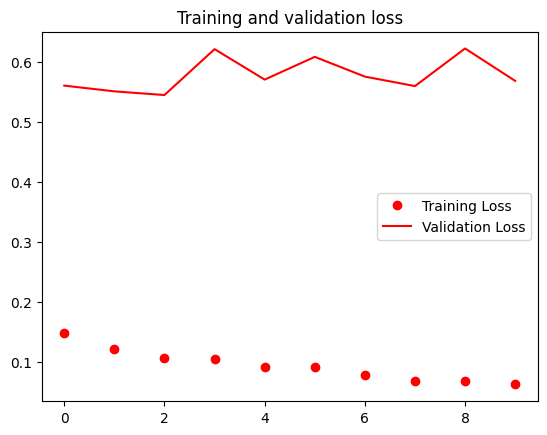

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = cnn_model.predict(x_test_gray_norm)
y_true = y_test

395/395 [==============================] - 3s 8ms/step


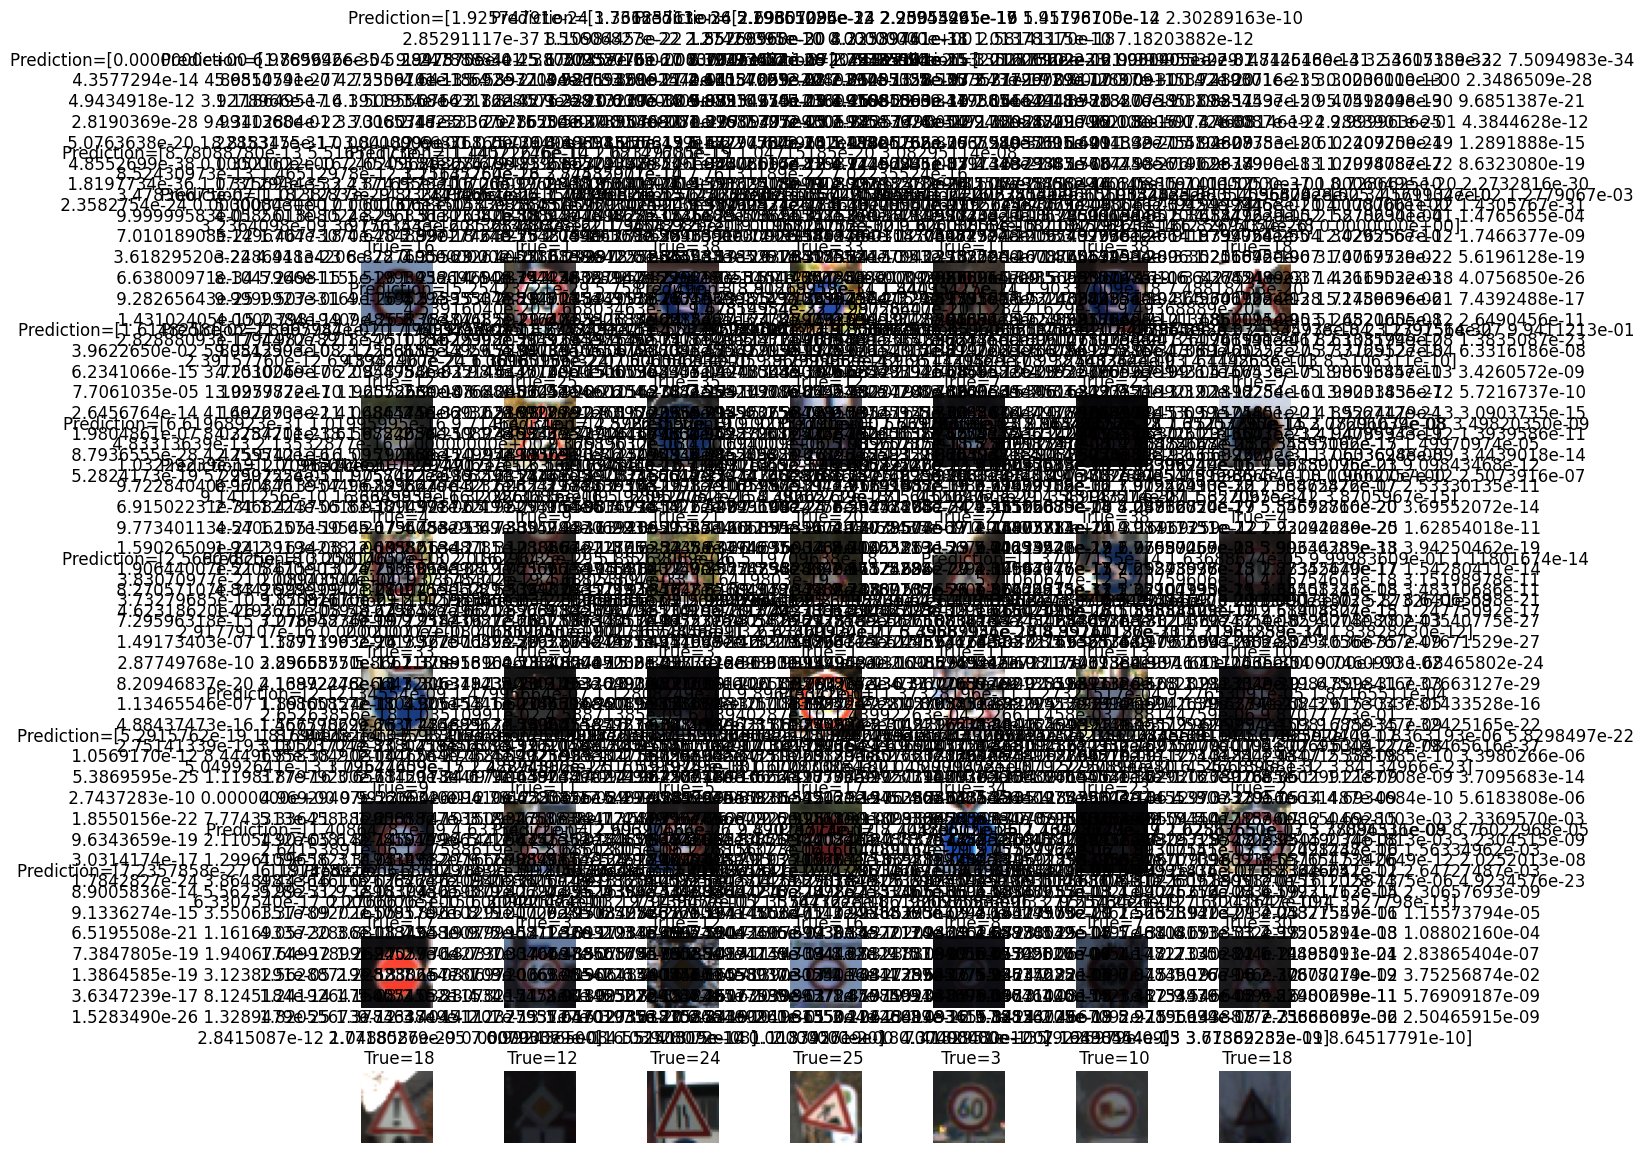

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)